In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_SW_Learner import *
from experiment_utilities import*
from Advertising.learners.UCB_sw import*

import math

from tqdm.autonotebook import tqdm
from Advertising.learners.TS_sliding_window import *
import itertools

arms = arms_creation(seed=30291, number_of_arms=20)

seed = 6789
random.seed(seed)
only_first = True
#initialization
n_experiments = 10
variance = 8.5
expected_values = []
interval = 10000
n_rounds= 40000
sw_size = 3500
#sw_size = math.isqrt(n_experiments)
n_change = (int)(n_experiments/interval)
exploration=4.2

lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(
    json_path_network='Config/network.json', json_path_features='Config/features.json')




with open("Config/estimated_influence.json", "r"):
    data = json.load(open("Config/estimated_influence.json"))

active_by_influence_reward = np.array(data.get("estimated_influence"))



with open('Config/clairvoyants_sw.json', 'r') as file:
    clairvoyants = json.load(file)
clairvoyants_first = clairvoyants.get('clairvoyant_f_sw')
clairvoyants_all = clairvoyants.get('clairvoyant_a_sw')


with open('Config/bids.json', 'r') as file:
    bids = json.load(file)
    list_of_bids = bids.get('bids')
#print(list_of_bids)

### Running multiple experiments for "only first sample"

In [ ]:
# moving_avarage_only_mean_ts = []

# moving_avarage_only_ts = experiment(n_experiments, ts_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval)
# moving_avarage_only_mean_ts.append(moving_avarage_only_ts)
# cum_mov_avarage_only_ts = np.cumsum(np.mean(moving_avarage_only_mean_ts, axis=0))
rewards_per_exp_ts_only = []
rewards_per_exp_ucb_only = []

ma_per_exp_ts_only = []
ma_per_exp_ucb_only = []

for exp in trange(n_experiments):
    ts_learner = GTS_SW_Learner(arms, variance=variance, size_SW=sw_size, ad_id=1)
    ucb_learner = UCB_sw(arms = arms, hyperpar= exploration, window_size= sw_size)

    ma_per_exp_ts_only.append(experiment(n_rounds, ts_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval))
    ma_per_exp_ucb_only.append(experiment(n_rounds, ucb_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval))
    rewards_per_exp_ucb_only.append(ucb_learner.collected_rewards)
    rewards_per_exp_ts_only.append(ts_learner.collected_rewards)

### Running multiple experiments for "all samples"

In [ ]:
# moving_avarage_only_mean_ts = []

# moving_avarage_only_ts = experiment(n_experiments, ts_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval)
# moving_avarage_only_mean_ts.append(moving_avarage_only_ts)
# cum_mov_avarage_only_ts = np.cumsum(np.mean(moving_avarage_only_mean_ts, axis=0))
rewards_per_exp_ts_all = []
rewards_per_exp_ucb_all = []

ma_per_exp_ts_all = []
ma_per_exp_ucb_all = []

for exp in trange(n_experiments):
    ts_learner = GTS_SW_Learner(arms, variance=variance, size_SW=sw_size, ad_id=1)
    ucb_learner = UCB_sw(arms = arms, hyperpar= exploration, window_size= sw_size)

    ma_per_exp_ts_all.append(experiment(n_rounds, ts_learner, list_of_bids, social_network, arms, not only_first, sliding_window = True, interval=interval))
    ma_per_exp_ucb_all.append(experiment(n_rounds, ucb_learner, list_of_bids, social_network, arms, not only_first, sliding_window = True, interval=interval))
    rewards_per_exp_ucb_all.append(ucb_learner.collected_rewards)
    rewards_per_exp_ts_all.append(ts_learner.collected_rewards)

### Clairvoyants

In [8]:
clairvoyant_non_cum_only = []
for i in range(0, len(clairvoyants_first)):
    for j in range(0, interval):
        #clairvoyant_non_cum.append(expected_values_list_only[i][index])
        clairvoyant_non_cum_only.append(clairvoyants_first[i])

clairvoyant_cum_only = clairvoyant_non_cum_only.append(clairvoyant_non_cum_only[-1])
clairvoyant_cum_only = np.cumsum(clairvoyant_non_cum_only)


In [9]:
clairvoyant_non_cum_all = []
for i in range(0, len(clairvoyants_all)):
    for j in range(0, interval):
        #clairvoyant_non_cum.append(expected_values_list_only[i][index])
        clairvoyant_non_cum_all.append(clairvoyants_all[i])

clairvoyant__non_cum_all = clairvoyant_non_cum_all.append(clairvoyant_non_cum_all[-1])
clairvoyant_cum_all = np.cumsum(clairvoyant_non_cum_all)


### Plotting

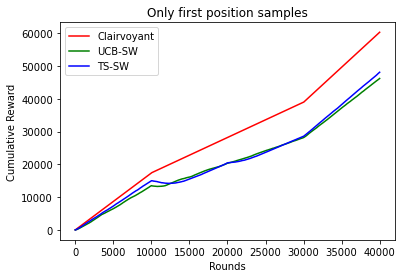

Text(0.5, 1.0, 'Only first position samples')

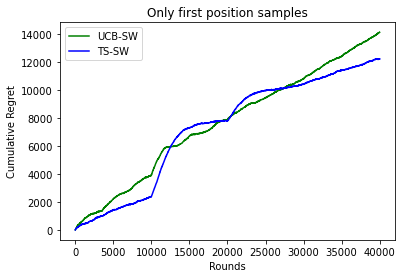

In [10]:
rewards_ts_only = np.mean(rewards_per_exp_ts_only, axis = 0)
rewards_ucb_only = np.mean(rewards_per_exp_ucb_only, axis = 0)

ma_ts_only = np.mean(ma_per_exp_ts_only, axis = 0)
ma_ucb_only = np.mean(ma_per_exp_ucb_only, axis = 0)

plt.figure(0)
plt.plot(clairvoyant_cum_only, 'r')
plt.plot(np.cumsum(rewards_ucb_only), 'g')
plt.plot(np.cumsum(rewards_ts_only), 'b')
plt.ylabel("Cumulative Reward")
plt.xlabel("Rounds")
plt.legend(["Clairvoyant", "UCB-SW", "TS-SW"])
plt.title("Only first position samples")

plt.show()

cum_regret_ts_only = np.cumsum(np.subtract(clairvoyant_non_cum_only[1:], rewards_ts_only)) 
cum_regret_ucb_only = np.cumsum(np.subtract(clairvoyant_non_cum_only[1:], rewards_ucb_only)) 

plt.figure(1)
plt.plot(cum_regret_ucb_only, 'g')
plt.plot(cum_regret_ts_only, 'b')
plt.ylabel("Cumulative Regret")
plt.xlabel("Rounds")
plt.legend(["UCB-SW", "TS-SW"])
plt.title("Only first position samples")





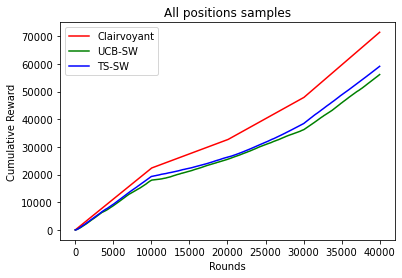

Text(0.5, 1.0, 'All positions samples')

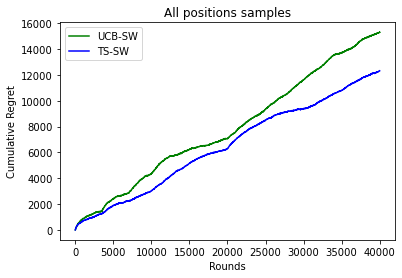

In [14]:
rewards_ts_all = np.mean(rewards_per_exp_ts_all, axis = 0)
rewards_ucb_all = np.mean(rewards_per_exp_ucb_all, axis = 0)

ma_ts_all = np.mean(ma_per_exp_ts_all, axis = 0)
ma_ucb_all = np.mean(ma_per_exp_ucb_all, axis = 0)

plt.figure(0)
plt.plot(clairvoyant_cum_all, 'r')
plt.plot(np.cumsum(rewards_ucb_all), 'g')
plt.plot(np.cumsum(rewards_ts_all), 'b')
plt.ylabel("Cumulative Reward")
plt.xlabel("Rounds")
plt.legend(["Clairvoyant", "UCB-SW", "TS-SW"])
plt.title("All positions samples")

plt.show()

cum_regret_ts_all = np.cumsum(np.subtract(clairvoyant_non_cum_all[1:], rewards_ts_all)) 
cum_regret_ucb_all = np.cumsum(np.subtract(clairvoyant_non_cum_all[1:], rewards_ucb_all)) 

plt.figure(1)
plt.plot(cum_regret_ucb_all, 'g')
plt.plot(cum_regret_ts_all, 'b')
plt.ylabel("Cumulative Regret")
plt.xlabel("Rounds")
plt.legend(["UCB-SW", "TS-SW"])
plt.title("All positions samples")



